# Read files

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the attention matrices
attention_matrices = np.load('runs/data/andrii0_wd0.0001_dr0.1_rTEMP/key_electrodes/model_epoch100/key_electrodes_btbank3_1_onset_attention.npy', allow_pickle=True)

In [5]:
x = np.array(attention_matrices.item()['analysis_results']).mean(axis=0)
x.shape

(5, 121, 121)

In [2]:
electrode_labels = attention_matrices.item()['electrode_labels']
electrode_labels

['CLS',
 'P2b14',
 'P2b6',
 'O1bId13',
 'F3aOF6',
 'T1b6',
 'P2a8',
 'F3aOF3',
 'O1bId14',
 'O1aIb13',
 'F2Ia5',
 'F2Ia13',
 'O1bId4',
 'P2a2',
 'O1aIb1',
 'F3aOF2',
 'F2Ia11',
 'F2Ia4',
 'F3d6',
 'O1aIb4',
 'F3c9',
 'O1bId3',
 'O1bId11',
 'F3c5',
 'O1aIb5',
 'P2a1',
 'T1cIe11',
 'P2b15',
 'O1bId2',
 'T1cIe8',
 'F2Ia9',
 'F3c10',
 'F2Ia1',
 'P2b8',
 'F3c4',
 'T1cIe12',
 'F2Ia7',
 'T1aIc1',
 'T1cIe9',
 'O1aIb2',
 'F3c6',
 'P2a3',
 'O1aIb7',
 'O1aIb11',
 'F3d10',
 'F3d8',
 'P2b16',
 'F3d2',
 'F3b8',
 'F3aOF4',
 'F2Ia6',
 'T1cIe6',
 'O1aIb14',
 'T1aIc2',
 'P2b10',
 'F3aOF7',
 'O1aIb16',
 'F3c8',
 'P2b3',
 'F2Ia3',
 'T1b3',
 'P2b13',
 'P2a10',
 'F3c3',
 'T1aIc3',
 'T1cIe10',
 'T1aIc6',
 'O1aIb9',
 'P2b9',
 'O1bId9',
 'P2a5',
 'F3c1',
 'F3c2',
 'F2Ia10',
 'F3d3',
 'O1bId15',
 'F3b1',
 'F2Ia8',
 'T1b2',
 'P2b5',
 'F2Ia12',
 'F3aOF5',
 'T1b5',
 'O1aIb6',
 'T1aIc4',
 'P2b12',
 'P2b11',
 'F3d7',
 'F3b2',
 'P2a4',
 'P2a9',
 'O1bId1',
 'O1aIb3',
 'O1bId5',
 'T1b4',
 'O1aIb8',
 'F3aOF1',
 'F3aOF8'

In [3]:
attention_matrices.item()

{'analysis_results': [array([[[0.16018562, 0.00997066, 0.00562779, ..., 0.00726586,
           0.00503971, 0.00639672],
          [0.09946841, 0.0121758 , 0.00727883, ..., 0.00721114,
           0.00586539, 0.00716457],
          [0.09212191, 0.00832604, 0.01293564, ..., 0.00727488,
           0.00587727, 0.00673922],
          ...,
          [0.09294443, 0.00837719, 0.00745453, ..., 0.01242787,
           0.00610675, 0.00701196],
          [0.08972792, 0.00834539, 0.00740191, ..., 0.00760424,
           0.01144975, 0.0070452 ],
          [0.10294817, 0.00884336, 0.00774294, ..., 0.00744544,
           0.00606768, 0.00985136]],
  
         [[0.00230766, 0.0091723 , 0.00801473, ..., 0.00882696,
           0.00794162, 0.00913143],
          [0.07939919, 0.02533106, 0.0071032 , ..., 0.0076608 ,
           0.0074308 , 0.00736273],
          [0.09087934, 0.00763326, 0.02526025, ..., 0.00783474,
           0.00674305, 0.00682766],
          ...,
          [0.08850911, 0.00793516, 0.00680526,

# Plotting Attention Matrices

With CLS token

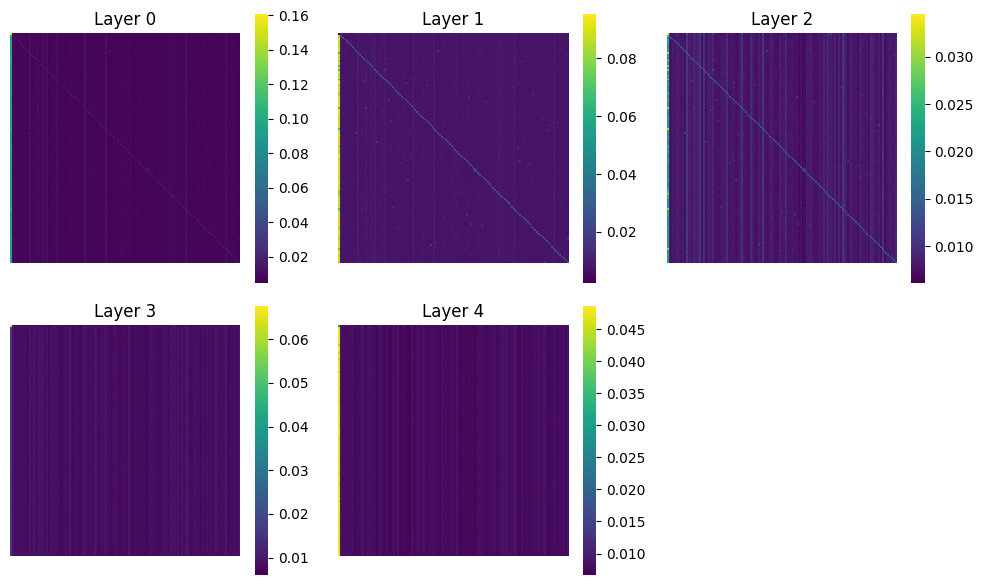

In [6]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.heatmap(x[i], cmap='viridis', annot=False, fmt='.3f', square=True, xticklabels=False, yticklabels=False)
    plt.title(f'Layer {i}')

plt.tight_layout()
plt.show()

Without CLS token

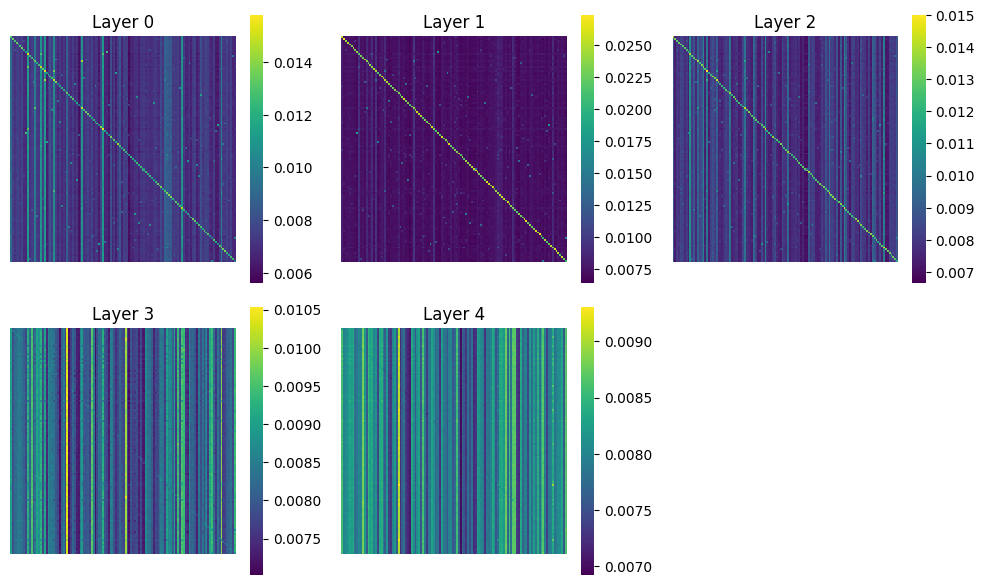

In [7]:
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.heatmap(x[i][1:,1:], cmap='viridis', annot=False, fmt='.3f', square=True, xticklabels=False, yticklabels=False)
    plt.title(f'Layer {i}')

plt.tight_layout()
plt.show()

Saving both to PDF

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# x: list/array of matrices, electrode_labels: list of labels

with PdfPages('attention_matrices.pdf') as pdf:
    for i in range(5):
        plt.figure(figsize=(25, 25))
        sns.heatmap(x[i], cmap='viridis', annot=False, fmt='.3f', square=True,
                    xticklabels=electrode_labels, yticklabels=electrode_labels)
        plt.title(f'Layer {i} with CLS')
        pdf.savefig()  # Save BEFORE plt.show()
        plt.close()

        plt.figure(figsize=(25, 25))
        sns.heatmap(x[i][1:,1:], cmap='viridis', annot=False, fmt='.3f', square=True,
                    xticklabels=electrode_labels[1:], yticklabels=electrode_labels[1:])
        plt.title(f'Layer {i} without CLS')
        pdf.savefig()  # Save BEFORE plt.show()
        plt.close()

array([0.16114625, 0.0102944 , 0.00602709, 0.00645471, 0.00698623,
       0.00779929, 0.00657701, 0.00671989, 0.00611197, 0.00590889,
       0.01120515, 0.00663011, 0.00711394, 0.00672489, 0.00864594,
       0.00685682, 0.00682316, 0.01247432, 0.00644139, 0.01303368,
       0.00534712, 0.0066317 , 0.00871537, 0.00715033, 0.01102533,
       0.00655698, 0.00567794, 0.00747683, 0.00594228, 0.00661852,
       0.00608105, 0.00992968, 0.00588909, 0.00645145, 0.00667988,
       0.00570684, 0.00596534, 0.00505085, 0.00659033, 0.01220734,
       0.00636955, 0.00640778, 0.0066356 , 0.00618228, 0.00776629,
       0.00613888, 0.00705321, 0.00618628, 0.00584716, 0.00684686,
       0.01106545, 0.00588706, 0.00589677, 0.00505571, 0.00773833,
       0.00614937, 0.0065398 , 0.00592163, 0.00599464, 0.00795654,
       0.0063514 , 0.00772055, 0.00801815, 0.0064187 , 0.00503697,
       0.0058301 , 0.0060351 , 0.00600435, 0.0068026 , 0.00568654,
       0.00629966, 0.00574769, 0.00573603, 0.00693267, 0.00641

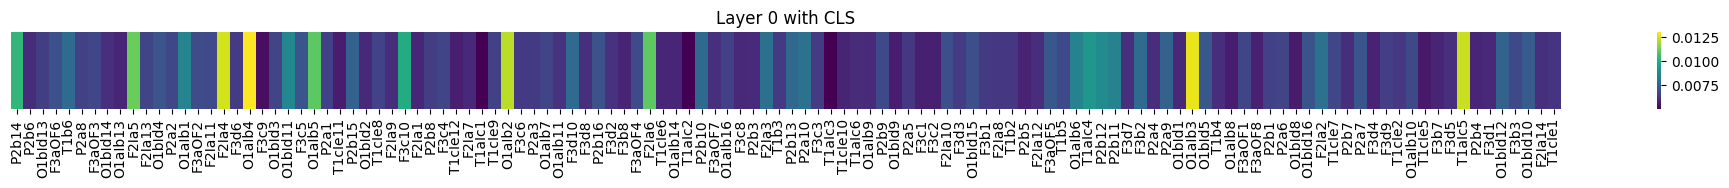

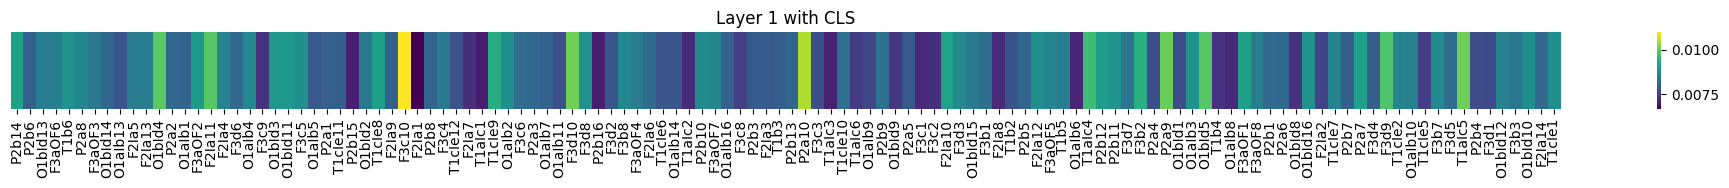

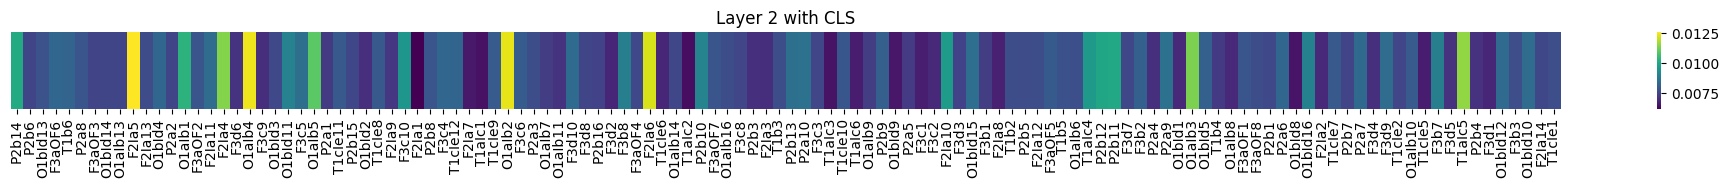

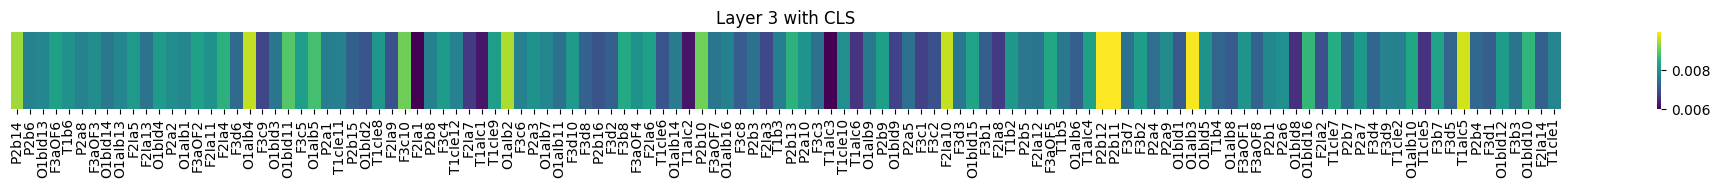

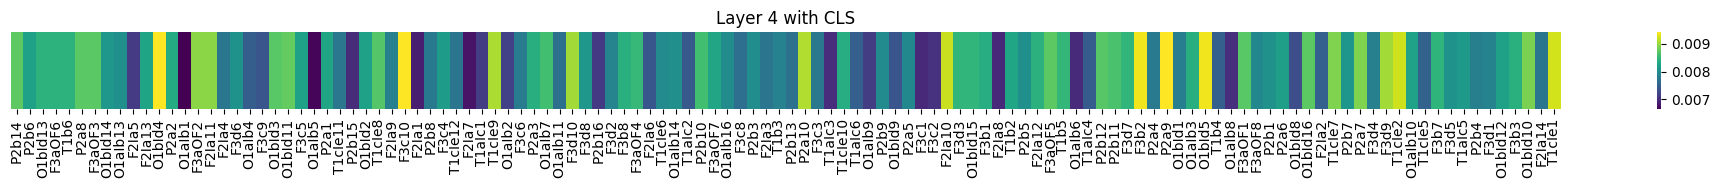

In [8]:
for i in range(5):
    plt.figure(figsize=(25, 1))
    sns.heatmap(x[i][0:1, 1:], cmap='viridis', annot=False, fmt='.3f', square=False,
                xticklabels=electrode_labels[1:], yticklabels=False)
    plt.title(f'Layer {i} with CLS')
    plt.show()

# Neuroprobe Visualization

In [9]:
import os
#os.chdir('..') # go back to the root directory

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import json
import glob
import random
from evaluation.neuroprobe.config import *
# from evaluation.neuroprobe.braintreebank_subject import BrainTreebankSubject as Subject
from subject.braintreebank import BrainTreebankSubject as Subject
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'assets/font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

# all possible pairs of (subject_id, trial_id)
all_subject_trials = [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (6, 0), (6, 1), (6, 4), (7, 0), (7, 1), (8, 0), (9, 0), (10, 0), (10, 1)]

In [ ]:
electrode

In [18]:
(coords_df['Electrode'] == 'F3c9').any()

False

In [10]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

matlab_xlim = (-108.0278, 108.0278)
matlab_ylim = (-72.9774, 72.9774)

base_path = os.path.join(ROOT_DIR, 'localization')
left_hem_file_name = 'left_hem_clean.png'
right_hem_file_name = 'right_hem_clean.png'
coords_file_name = 'elec_coords_full.csv'
correlations_file = 'lag_correlation.json'

left_hem_img = plt.imread(os.path.join(base_path, left_hem_file_name))
right_hem_img = plt.imread(os.path.join(base_path, right_hem_file_name))
coords_df = pd.read_csv(os.path.join(base_path, coords_file_name))
split_elec_id = coords_df['ID'].str.split('-')
coords_df['Subject'] = [t[0] for t in split_elec_id]
coords_df['Electrode'] = [t[1] for t in split_elec_id]

# Scale Matlab electrode locations to Python format
def scale(x, s, d):
    return -(x - d) * s

x_scale = left_hem_img.shape[1] / (matlab_xlim[1] - matlab_xlim[0])
y_scale_l = left_hem_img.shape[0] / (matlab_ylim[1] - matlab_ylim[0])

y_scale_r = right_hem_img.shape[0] / (matlab_ylim[1] - matlab_ylim[0])

scaled_coords_df = coords_df.copy()

# scale left hemisphere coordinates
scaled_coords_df.loc[scaled_coords_df['Hemisphere'] == 1, 'X'] = coords_df.loc[coords_df['Hemisphere'] == 1, 'X'].apply(lambda x: scale(x, x_scale, matlab_xlim[1]))
scaled_coords_df.loc[scaled_coords_df['Hemisphere'] == 1, 'Y'] = coords_df.loc[coords_df['Hemisphere'] == 1, 'Y'].apply(lambda x: scale(x, y_scale_l, matlab_ylim[1]))

# scale right hemisphere coordinates
scaled_coords_df.loc[scaled_coords_df['Hemisphere'] == 0, 'X'] = coords_df.loc[coords_df['Hemisphere'] == 0, 'X'].apply(lambda x: -scale(x, y_scale_r, matlab_xlim[0]))
scaled_coords_df.loc[scaled_coords_df['Hemisphere'] == 0, 'Y'] = coords_df.loc[coords_df['Hemisphere'] == 0, 'Y'].apply(lambda x: scale(x, y_scale_r, matlab_ylim[1]))

def plot_hemisphere_axis(electrodes, colors=None, ax=None, hemisphere="left", title=None, vmin=0, vmax=0.1):
    '''
    electrodes is a dict of format {<subject>: [<electrode>]}
    '''
    if colors is None: c = 'white'
    ax.set_aspect('equal')

    if hemisphere=="left":
        ax.imshow(left_hem_img)
    elif hemisphere=="right":
        ax.imshow(right_hem_img)
    
    ax.axis('off')
    assert hemisphere in ["left", "right"]
    hem_index = 1 if hemisphere=="left" else 0

    plot_title = f'{hemisphere} hemisphere'
    if title: plot_title += f' {title}'
   
    all_x, all_y, all_colors = [], [], []
    for s in electrodes:
        for e in electrodes[s]:
            x = list(scaled_coords_df[(scaled_coords_df.Subject == s) & (scaled_coords_df.Electrode == e) & (scaled_coords_df.Hemisphere==hem_index)]['X'])
            y = list(scaled_coords_df[(scaled_coords_df.Subject == s) & (scaled_coords_df.Electrode == e) & (scaled_coords_df.Hemisphere==hem_index)]['Y'])
            if (len(x) == 0 or len(y) == 0) and hemisphere == "left":
                print(f"Warning: No coordinates found for subject {s} and electrode {e} in {hemisphere} hemisphere")
            if len(x) == 0 or len(y) == 0:
                continue
            
            assert len(x) == len(y) == 1, f"For subject {s} and electrode {e}, x: {x}, y: {y}"

            all_x += x
            all_y += y
            all_colors += [colors[e]]
    print(all_colors)
    
    all_x = np.array(all_x)
    all_y = np.array(all_y)
    all_colors = np.array(all_colors)
    # Sort points by color value so lower values appear on top
    sort_idx = np.argsort(all_colors)[::-1]
    sc = ax.scatter(all_x[sort_idx], all_y[sort_idx], c=all_colors[sort_idx], vmin=vmin, vmax=vmax, s=100, edgecolors='black', cmap='viridis_r')
    
def plot_hemispheres_separately(electrodes, ax1, ax2, colors=None, vmin=0, vmax=0.1):
    plot_hemisphere_axis(electrodes, colors=colors, ax=ax1, hemisphere="right", vmin=vmin, vmax=vmax)
    plot_hemisphere_axis(electrodes, colors=colors, ax=ax2, hemisphere="left", vmin=vmin, vmax=vmax)

In [11]:
attention_matrices = np.load('runs/data/andrii0_wd0.0001_dr0.1_rTEMP/key_electrodes/model_epoch100/key_electrodes_btbank3_1_onset_attention.npy', allow_pickle=True)
x = np.array(attention_matrices.item()['analysis_results']).mean(axis=0)
cmap = plt.cm.viridis(x[0][0, 1:])

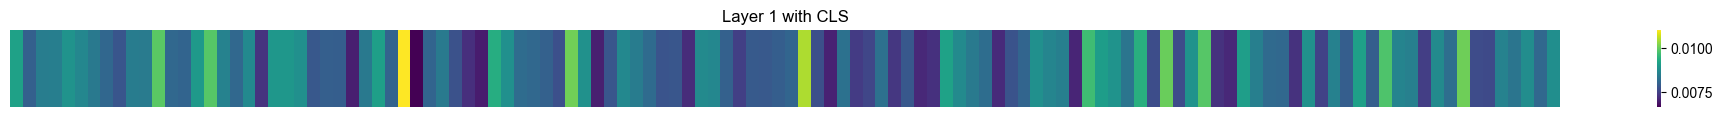

In [12]:
import seaborn as sns
plt.figure(figsize=(25, 1))
sns.heatmap(x[1][0:1, 1:], cmap='viridis', annot=False, fmt='.3f', square=False,
            xticklabels=False, yticklabels=False)
plt.title(f'Layer {1} with CLS')
plt.show()

[]
['#32b57a', '#472b7a', '#433c84', '#3b508a', '#2f6a8d', '#414186', '#3f4587', '#462f7c', '#472676', '#69cc5b', '#404387', '#39548b', '#3f4788', '#24848d', '#3d4b89', '#3d4a89', '#d2e11b', '#433b83', '#404387', '#24868d', '#39558b', '#424085', '#481d6f', '#33608d', '#472777', '#414286', '#462d7c', '#472676', '#433c84', '#404487', '#481e70', '#472878', '#414186', '#443982', '#433a83', '#46317e', '#2f698d', '#46307d', '#3a528b', '#46317e', '#482374', '#3d4a89', '#5ec961', '#472676', '#472676', '#30688d', '#46307d', '#424085', '#472777', '#472a79', '#2d6f8e', '#443982', '#30678d', '#433b83', '#440154', '#482374', '#472b7a', '#472a79', '#3e4989', '#481d6f', '#453681', '#482071', '#482071', '#3c4d8a', '#433b83', '#3c4e8a', '#443982', '#453681', '#453681', '#482273', '#472c7b', '#38578c', '#3e4888', '#1e978a', '#228a8d', '#25828e', '#46307d', '#2f6a8d', '#472c7b', '#32628d', '#472777', '#38578c', '#472c7b', '#404487', '#482172', '#424085', '#404387', '#481a6c', '#3a538b', '#2c718e', '#3f47

/tmp/ipykernel_682730/1658750751.py:80: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  sc = ax.scatter(all_x[sort_idx], all_y[sort_idx], c=all_colors[sort_idx], vmin=vmin, vmax=vmax, s=100, edgecolors='black', cmap='viridis_r')


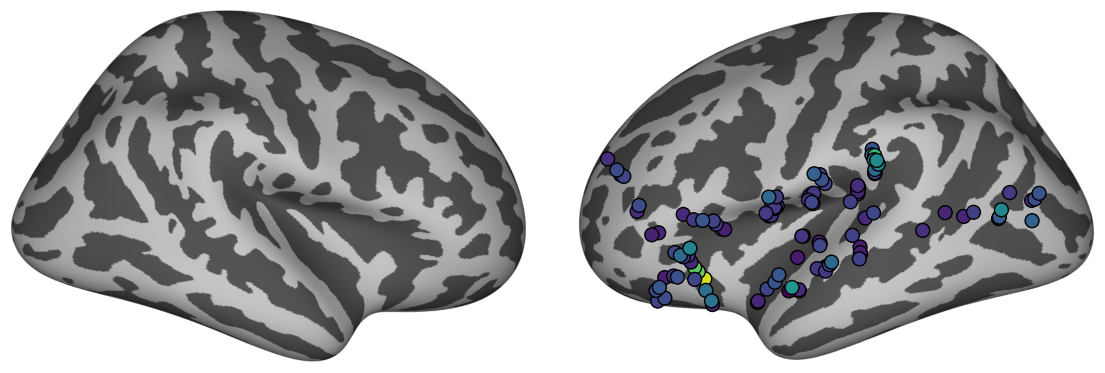

In [13]:
vmin, vmax = 0, 1
fig, axes = plt.subplots(1, 2, figsize=(14, 9),
                        gridspec_kw={'wspace': 0.1})

# Collect all electrodes across subjects
all_electrodes = {}
for subject_id in [3]:
    subject_class = Subject(subject_id, cache=False)
    all_electrodes[f"sub_{subject_id}"] = subject_class.electrode_labels

attention_matrix_electrodes = {
    'sub_3': attention_matrices.item()['electrode_labels'][1:]
}

from matplotlib.colors import Normalize

# Create white colors for all electrodes
colors = {}
norm = Normalize(x[0][0, 1:].min(), x[0][0, 1:].max())
cmap = plt.cm.viridis
colors_rgba = cmap(norm(x[0][0, 1:]))
for i, electrode_label in enumerate(attention_matrices.item()['electrode_labels']):
    if electrode_label == 'CLS':
        continue

    color = colors_rgba[attention_matrices.item()['electrode_labels'].index(electrode_label)-1]
    # Convert RGBA array to hex color string
    color_str = '#{:02x}{:02x}{:02x}'.format(
        int(color[0] * 255),
        int(color[1] * 255), 
        int(color[2] * 255)
    )
    colors[electrode_label] = color_str

# Plot all subjects on single pair of hemispheres
plot_hemispheres_separately(attention_matrix_electrodes, axes[0], axes[1], colors=colors)

# plt.savefig('figures/hemispheres_electrodes.pdf', bbox_inches='tight', dpi=300)

# Visualize Attention

In [ ]:
from visualize_attention import create_attention_brain_plots
create_attention_brain_plots(
    'runs/data/andrii0_wd0.0001_dr0.1_rTEMP/key_electrodes/model_epoch100/key_electrodes_btbank3_1_onset_attention.npy',
    'attention_brain_plots_subject_3.pdf'
)